# Computations of ECS, TCR and TCRE in CanESM5 and CanESM2

## Calculate Gregory et al. 2004 Equilibrium Climate Sensitivity for CanESM

### the difference between this and version 2 of this notebook is that here I linearly detrend using the exact years from the piControl, and use the exact 140 year from 1850 to 1989.

In [143]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc4
import xarray as xr
import scipy as sp
from scipy import stats

In [144]:
color_dict = {'CanESM5':'C1','CanESM2':'C0'}


In [145]:
tas = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc')
tas_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc')
rtmt = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/abrupt-4xCO2/r1i1p1f1/Amon/rtmt/gn/v20190429/rtmt_Amon_CanESM5_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc')
rtmt_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Amon/rtmt/gn/v20190429/rtmt_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc')
areacella = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/abrupt-4xCO2/r1i1p1f1/fx/areacella/gn/v20190429/areacella_fx_CanESM5_abrupt-4xCO2_r1i1p1f1_gn.nc')

In [146]:
tas_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/abrupt4xCO2/mon/atmos/tas/r1i1p1/tas_Amon_CanESM2_abrupt4xCO2_r1i1p1_185001-199912.nc')
pi_dir_tas_c2='/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/piControl/mon/atmos/tas/r1i1p1/'
tas_c2_pic = xr.open_mfdataset([pi_dir_tas_c2 + 'tas_Amon_CanESM2_piControl_r1i1p1_231101-241012.nc', pi_dir_tas_c2 + 'tas_Amon_CanESM2_piControl_r1i1p1_241101-251012.nc'])

rtmt_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/abrupt4xCO2/mon/atmos/rtmt/r1i1p1/rtmt_Amon_CanESM2_abrupt4xCO2_r1i1p1_185001-199912.nc')
pi_dir_rtmt_c2='/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/piControl/mon/atmos/rtmt/r1i1p1/'
rtmt_c2_pic = xr.open_mfdataset([pi_dir_rtmt_c2 + 'rtmt_Amon_CanESM2_piControl_r1i1p1_231101-241012.nc', pi_dir_rtmt_c2 + 'rtmt_Amon_CanESM2_piControl_r1i1p1_241101-251012.nc'])
areacella_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/abrupt4xCO2/fx/atmos/areacella/r0i0p0/areacella_fx_CanESM2_abrupt4xCO2_r0i0p0.nc')

In [147]:
5201+140

5341

In [170]:
tas_mean = ((areacella['areacella']*tas['tas']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean().sel(time=slice('1850-01-01', '1989-12-31'))
rtmt_mean = ((areacella['areacella']*rtmt['rtmt']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean().sel(time=slice('1850-01-01', '1989-12-31'))

tas_c2_mean = ((areacella_c2['areacella']*tas_c2['tas']).sum(dim=['lat', 'lon']) / areacella_c2['areacella'].sum()).resample(time='A').mean().sel(time=slice('1850-01-01', '1989-12-31'))
rtmt_c2_mean = ((areacella_c2['areacella']*rtmt_c2['rtmt']).sum(dim=['lat', 'lon']) / areacella_c2['areacella'].sum()).resample(time='A').mean().sel(time=slice('1850-01-01', '1989-12-31'))

tas_pic_mean = ((areacella['areacella']*tas_pic['tas']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean().sel(time=slice('5201-01-01', '5340-12-31'))
tas_c2_pic_mean = ((areacella_c2['areacella']*tas_c2_pic['tas']).sum(dim=['lat', 'lon']) / areacella_c2['areacella'].sum()).resample(time='A').mean().sel(time=slice('2321-01-01', '2460-12-31'))

rtmt_pic_mean = ((areacella['areacella']*rtmt_pic['rtmt']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean().sel(time=slice('5201-01-01', '5340-12-31'))
rtmt_c2_pic_mean = ((areacella_c2['areacella']*rtmt_c2_pic['rtmt']).sum(dim=['lat', 'lon']) / areacella_c2['areacella'].sum()).resample(time='A').mean().sel(time=slice('2321-01-01', '2460-12-31'))

tas_pic_tmean = tas_pic_mean.mean(dim='time')
tas_c2_pic_tmean = tas_c2_pic_mean.mean(dim='time')

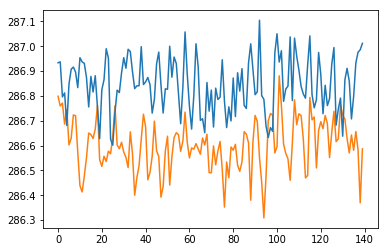

In [171]:
y = np.arange(140)
plt.plot(y,tas_pic_mean,color=color_dict['CanESM5'])
plt.plot(y,tas_c2_pic_mean,color=color_dict['CanESM2'])

In [172]:
# Compute the slopes in the piControl run of tas and rtmt
slope_tas, intercept_tas, _, _, _ = stats.linregress(y, tas_pic_mean.values)
slope_rtmt, intercept_rtmt, _, _, _ = stats.linregress(y, rtmt_pic_mean.values)

slope_tas_c2, intercept_tas_c2, _, _, _ = stats.linregress(y, tas_c2_pic_mean.values)
slope_rtmt_c2, intercept_rtmt_c2, _, _, _ = stats.linregress(y, rtmt_c2_pic_mean.values)

In [173]:
# Subtract the piControl trend from the abrupt-4xCO2 data

tas_mean_dt = tas_mean - (y * slope_tas + intercept_tas)
tas_c2_mean_dt = tas_c2_mean - (y * slope_tas_c2 + intercept_tas_c2)

rtmt_mean_dt = rtmt_mean - (y * slope_rtmt + intercept_rtmt)
rtmt_c2_mean_dt = rtmt_c2_mean - (y * slope_rtmt_c2 + intercept_rtmt_c2)

In [174]:
(tas_mean-tas_pic_tmean).plot(label='CanESM5',color=color_dict['CanESM5'], alpha=0.5)
(tas_c2_mean-tas_c2_pic_tmean).plot(label='CanESM2',color=color_dict['CanESM2'], alpha=0.5)

(tas_mean_dt).plot(label='CanESM5',color=color_dict['CanESM5'], linestyle='--')
(tas_c2_mean_dt).plot(label='CanESM2',color=color_dict['CanESM2'], linestyle='--')

plt.legend()

In [175]:
rtmt_mean.plot(label='CanESM5',color=color_dict['CanESM5'], alpha=0.5)
rtmt_c2_mean.plot(label='CanESM2',color=color_dict['CanESM2'], alpha=0.5)

rtmt_mean_dt.plot(label='CanESM5',color=color_dict['CanESM5'], linestyle='--')
rtmt_c2_mean_dt.plot(label='CanESM2',color=color_dict['CanESM2'], linestyle='--')

plt.legend()

In [176]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tas_mean_dt.values, rtmt_mean_dt.values,)
slope_c2, intercept_c2, r_value_c2, p_value_c2, std_err_c2 = stats.linregress(tas_c2_mean_dt.values, rtmt_c2_mean_dt.values,)

In [177]:
print (slope, intercept)
print (slope_c2, intercept_c2)

-0.6621284201068025 7.4166210880596575
-1.0455234024700963 7.698829486829422


In [178]:
print('ECS CanESM5: ', intercept/slope/2.0)
print('ECS CanESM2: ', intercept_c2/slope_c2/2.0)

ECS CanESM5:  -5.600591111059199
ECS CanESM2:  -3.6818063893359962


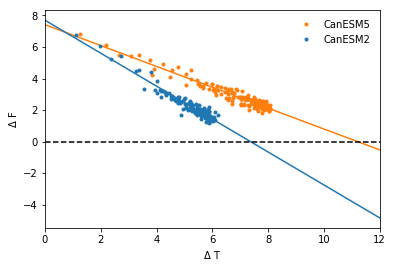

In [179]:
points,= plt.plot(tas_mean_dt.values, rtmt_mean_dt.values, '.', label='CanESM5',color=color_dict['CanESM5'])
plt.plot(np.arange(0,13), np.arange(0,13)*slope + intercept, color=points.get_color())
points, = plt.plot(tas_c2_mean_dt.values, rtmt_c2_mean_dt.values, '.', label='CanESM2',color=color_dict['CanESM2'])
plt.plot(np.arange(0,13), np.arange(0,13)*slope_c2 + intercept_c2, color=points.get_color())
plt.legend(frameon=False)
plt.plot([0,14], [0,0], 'k--')
plt.xlabel(r'$\Delta$ T')
plt.ylabel(r'$\Delta$ F')
plt.xlim([0,12])
plt.savefig('plots/fig-sX_ECS.png', bbox_inches='tight')

## Calculate the TCR of CanESM5 and CanESM2 based on the 1%/yr simulations

In [126]:
tas = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc')
tas_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc')
rtmt = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Amon/rtmt/gn/v20190429/rtmt_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc')
areacella = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/fx/areacella/gn/v20190429/areacella_fx_CanESM5_1pctCO2_r1i1p1f1_gn.nc')

In [127]:
tas_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/mon/atmos/tas/r1i1p1/tas_Amon_CanESM2_1pctCO2_r1i1p1_185001-198912.nc')
tas_c2_pic = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/piControl/mon/atmos/tas/r1i1p1/tas_Amon_CanESM2_piControl_r1i1p1_231101-241012.nc')
rtmt_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/mon/atmos/rtmt/r1i1p1/rtmt_Amon_CanESM2_1pctCO2_r1i1p1_185001-198912.nc')
areacella_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/fx/atmos/areacella/r0i0p0/areacella_fx_CanESM2_1pctCO2_r0i0p0.nc')

In [130]:
tas_mean = ((areacella['areacella']*tas['tas']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean().sel(time=slice('1850-01-01', '1930-12-31'))
tas_pic_mean = ((areacella['areacella']*tas_pic['tas']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean().sel(time=slice('5201-01-01', '5281-12-31'))

tas_c2_mean = ((areacella_c2['areacella']*tas_c2['tas']).sum(dim=['lat', 'lon']) / areacella_c2['areacella'].sum()).resample(time='A').mean().sel(time=slice('1850-01-01', '1930-12-31'))
tas_c2_pic_mean = ((areacella_c2['areacella']*tas_c2_pic['tas']).sum(dim=['lat', 'lon']) / areacella_c2['areacella'].sum()).resample(time='A').mean().sel(time=slice('2311-01-01', '2391-12-31'))

In [131]:
tas_mean.shape, tas_pic_mean.shape, tas_c2_mean.shape, tas_c2_pic_mean.shape

((81,), (81,), (81,), (81,))

In [133]:
# Compute the slopes in the piControl run of tas
y=np.arange(81)
slope_tas, intercept_tas, _, _, _ = stats.linregress(y, tas_pic_mean.values)
slope_tas_c2, intercept_tas_c2, _, _, _ = stats.linregress(y, tas_c2_pic_mean.values)

In [134]:
# Subtract the piControl trend from the abrupt-4xCO2 data

tas_mean_dt = tas_mean - (y * slope_tas + intercept_tas)
tas_c2_mean_dt = tas_c2_mean - (y * slope_tas_c2 + intercept_tas_c2)

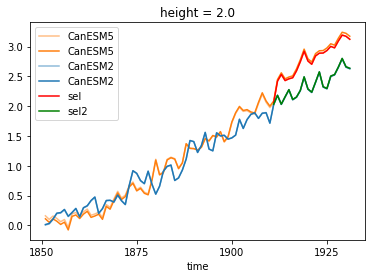

In [135]:
import cftime
tas_pic_tmean = tas_pic_mean.mean(dim='time')
tas_c2_pic_tmean = tas_c2_pic_mean.mean(dim='time')

(tas_mean-tas_pic_tmean).plot(label='CanESM5',color=color_dict['CanESM5'], alpha=0.5)
(tas_mean_dt).plot(label='CanESM5',color=color_dict['CanESM5'])
(tas_c2_mean-tas_c2_pic_tmean).plot(label='CanESM2',color=color_dict['CanESM2'], alpha=0.5)
(tas_c2_mean_dt).plot(label='CanESM2',color=color_dict['CanESM2'])

(tas_mean-tas_pic_tmean).sel(time=slice('1910-01-01', '1930-12-31')).plot(label='sel',color='r')
(tas_c2_mean-tas_c2_pic_tmean).sel(time=slice('1910-01-01', '1930-12-31')).plot(label='sel2',color='g')

#a=cftime.datetime(1920,6,15)
#plt.gca().axvline(a)
plt.legend()

In [136]:
print(tas_pic_tmean.values, tas_c2_pic_tmean.values)

286.5873 286.83783


In [137]:
print(tas_mean.sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)
print(tas_c2_mean.sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)

289.3604
289.2019


In [140]:
print('CanESM5 TCR: ', (tas_mean-tas_pic_tmean).sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)
print('CanESM2 TCR:', (tas_c2_mean-tas_c2_pic_tmean).sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)

CanESM5 TCR:  2.7730727
CanESM2 TCR: 2.3640296


In [141]:
print('CanESM5 TCR: ', (tas_mean_dt).sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)
print('CanESM2 TCR:', (tas_c2_mean_dt).sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)

CanESM5 TCR:  2.8110049133655175
CanESM2 TCR: 2.357896699214997


In [505]:
!ls $PWD/fig-sX*

/space/hall2/sitestore/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/fig-sX_ecs_tcr_tcre.ipynb


## Calculate the TCRE of CanESM5 and CanESM2 based on the 1%/yr simulations

In [24]:
!ls /space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/mon/ocnBgchem/fgco2/r1i1p1/fgco2_Omon_CanESM2_1pctCO2_r1i1p1_185001-198912.nc

/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/mon/ocnBgchem/fgco2/r1i1p1/fgco2_Omon_CanESM2_1pctCO2_r1i1p1_185001-198912.nc


In [25]:
nbp = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Lmon/nbp/gn/v20190429/nbp_Lmon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc')
nbp_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Lmon/nbp/gn/v20190429/nbp_Lmon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc')
fgco2 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Omon/fgco2/gn/v20190429/fgco2_Omon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc')
fgco2_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/fgco2/gn/v20190429/fgco2_Omon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc')
areacello = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Ofx/areacello/gn/v20190429/areacello_Ofx_CanESM5_piControl_r1i1p1f1_gn.nc')
nbp_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/mon/land/nbp/r1i1p1/nbp_Lmon_CanESM2_1pctCO2_r1i1p1_185001-198912.nc')
c2_pic_dir='/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/piControl/mon/land/nbp/r1i1p1/'
nbp_c2_pic = xr.open_mfdataset([c2_pic_dir + 'nbp_Lmon_CanESM2_piControl_r1i1p1_231101-241012.nc', c2_pic_dir + 'nbp_Lmon_CanESM2_piControl_r1i1p1_241101-251012.nc'])
areacello_c2=xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/fx/ocean/areacello/r0i0p0/areacello_fx_CanESM2_1pctCO2_r0i0p0.nc')
fgco2_c2 = xr.open_dataset('/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/1pctCO2/mon/ocnBgchem/fgco2/r1i1p1/fgco2_Omon_CanESM2_1pctCO2_r1i1p1_185001-198912.nc')

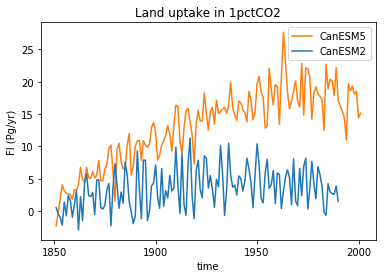

In [26]:
fl=((nbp.nbp*areacella.areacella).sum(dim=['lon', 'lat']).resample(time='A').mean()/1e15*3600*24*365*1000.)
fl.plot(label='CanESM5',color=color_dict['CanESM5'])
fl_c2=((nbp_c2.nbp*areacella_c2.areacella).sum(dim=['lon', 'lat']).resample(time='A').mean()/1e15*3600*24*365*1000.)
fl_c2.plot(label='CanESM2',color=color_dict['CanESM2'])
plt.ylabel('Fl (Pg/yr)')
plt.legend()
plt.title('Land uptake in 1pctCO2')
plt.savefig('plots/fig-Sx_Fl_1pctCO2.png', bbox_inches='tight')

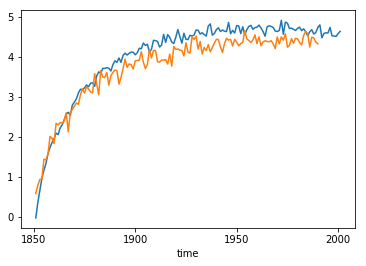

In [27]:
fo=((fgco2.fgco2*areacello.areacello).sum(dim=['j', 'i']).resample(time='A').mean()/1e15*3600*24*365*1000.)
fo.plot()
fo_c2=((fgco2_c2.fgco2*areacello_c2.areacello*12/44.).sum(dim=['lon', 'lat']).resample(time='A').mean()/1e15*3600*24*365*1000.)
fo_c2.plot()

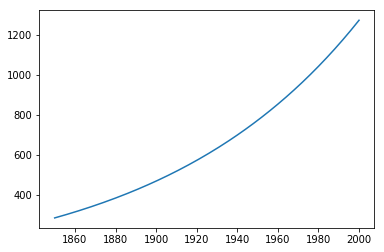

In [28]:
years = np.arange(1850, 2001)
co2 = 284.32*np.exp(0.01*(years-1850))
plt.plot(years,co2)

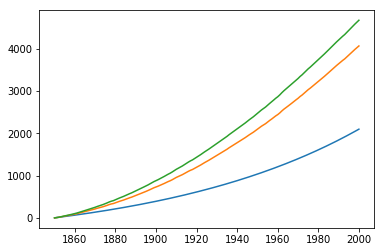

In [29]:
plt.plot(years, (co2-co2[0])*2.12)
plt.plot(years, (co2-co2[0])*2.12 + fl.cumsum())
plt.plot(years, (co2-co2[0])*2.12 + fl.cumsum()  +fo.cumsum())
Emissions = (co2-co2[0])*2.12 + fl.cumsum()  +fo.cumsum()

In [30]:
years_c2 = np.arange(1850, 1990)
co2_c2 = 284.32*np.exp(0.01*(years_c2-1850))
co2_anom_c2 = (co2_c2-co2_c2[0])
plt.plot(years_c2, co2_anom_c2*2.12)
plt.plot(years_c2, co2_anom_c2*2.12 + fl_c2.cumsum())
plt.plot(years_c2, co2_anom_c2*2.12 + fl_c2.cumsum()  + fo_c2.cumsum())
Emissions_c2 = co2_anom_c2*2.12 + fl_c2.cumsum()  + fo_c2.cumsum()

In [31]:
dco2dt = np.diff(co2*2.12)

In [32]:
dco2dt.shape

(150,)

In [33]:
e2 = np.cumsum(dco2dt + fl[0:150]  + fo[0:150])

In [34]:
TCRE = (tas_mean-tas_pic_tmean)/ (Emissions/1000.)
print('CanESM5 TCRE:', TCRE.sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)

TCRE_c2 = (tas_c2_mean-tas_c2_pic_tmean)/ (Emissions_c2/1000.)
print('CanESM2 TCRE:', TCRE_c2.sel(time=slice('1910-01-01', '1930-12-31')).mean(dim='time').values)
#for y,t in zip(TCRE, TCRE.time.dt.year):
#    print(y.values,t.values)

CanESM5 TCRE: 1.9240584555097557
CanESM2 TCRE: 2.2981936902592723


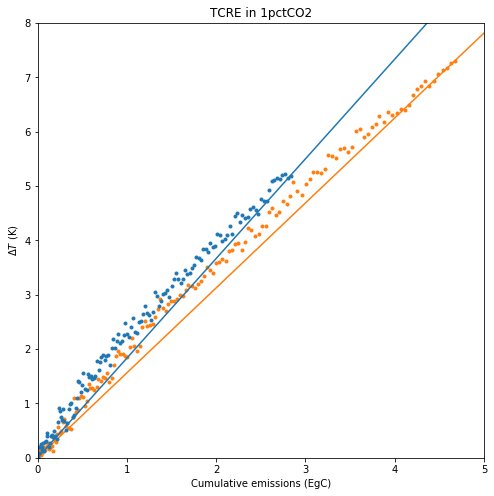

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Emissions/1000., tas_mean.values-tas_pic_tmean.values)
slope_c2, intercept_c2, r_value_c2, p_value_c2, std_err_c2 = stats.linregress(Emissions_c2/1000., tas_c2_mean.values-tas_c2_pic_tmean.values)

fig, ax = plt.subplots(1,1, figsize=(8,8))
dots, = ax.plot(Emissions/1000., tas_mean-tas_pic_tmean, '.', label='CanESM5',color=color_dict['CanESM5'])
xx = np.arange(0,6)
ax.plot(xx, xx*slope, color=dots.get_color())

dots, = ax.plot(Emissions_c2/1000., tas_c2_mean-tas_c2_pic_tmean, '.', label='CanESM2',color=color_dict['CanESM2'])
ax.plot(xx, xx*slope_c2, color=dots.get_color())

ax.set_xlabel('Cumulative emissions (EgC)')
ax.set_ylabel(r'$\Delta T$ (K)')
ax.axis([0,5,0,8])
ax.set_title('TCRE in 1pctCO2')
fig.savefig('plots/fig-Sx_TCRE.png', bbox_inches='tight')

In [538]:
slope

1.5626514492044223